In [4]:
from ast import increment_lineno
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [5]:
os.chdir('D:/ISHAN/NITK STUFF/SEM 3/HUMAN INTELLIGENCE/PROJECT/DATASETS/SwedishLeafDataset')
if os.path.isdir('train') is False:
    os.makedirs('train')
    os.makedirs('train/Ulmus_carpinifolia')
    os.makedirs('train/Acer')
    os.makedirs('train/Salix_aurita')
    os.makedirs('train/Quercus')
    os.makedirs('train/Alnus_incana')
    os.makedirs('train/Betula_pubescens')
    os.makedirs('train/Salix_alba')
    os.makedirs('train/Populus_tremula')
    os.makedirs('train/Ulmus_glabra')
    os.makedirs('train/Sorbus_aucuparia')
    os.makedirs('train/Salix_sinerea')
    os.makedirs('train/Populus')
    os.makedirs('train/Tilia')
    os.makedirs('train/Sorbus_intermedia')
    os.makedirs('train/Fagus_silvatica')

    os.makedirs('valid')
    os.makedirs('valid/Ulmus_carpinifolia')
    os.makedirs('valid/Acer')
    os.makedirs('valid/Salix_aurita')
    os.makedirs('valid/Quercus')
    os.makedirs('valid/Alnus_incana')
    os.makedirs('valid/Betula_pubescens')
    os.makedirs('valid/Salix_alba')
    os.makedirs('valid/Populus_tremula')
    os.makedirs('valid/Ulmus_glabra')
    os.makedirs('valid/Sorbus_aucuparia')
    os.makedirs('valid/Salix_sinerea')
    os.makedirs('valid/Populus')
    os.makedirs('valid/Tilia')
    os.makedirs('valid/Sorbus_intermedia')
    os.makedirs('valid/Fagus_silvatica')

    os.makedirs('test')
    os.makedirs('test/Ulmus_carpinifolia')
    os.makedirs('test/Acer')
    os.makedirs('test/Salix_aurita')
    os.makedirs('test/Quercus')
    os.makedirs('test/Alnus_incana')
    os.makedirs('test/Betula_pubescens')
    os.makedirs('test/Salix_alba')
    os.makedirs('test/Populus_tremula')
    os.makedirs('test/Ulmus_glabra')
    os.makedirs('test/Sorbus_aucuparia')
    os.makedirs('test/Salix_sinerea')
    os.makedirs('test/Populus')
    os.makedirs('test/Tilia')
    os.makedirs('test/Sorbus_intermedia')
    os.makedirs('test/Fagus_silvatica')
    
    for c in random.sample(glob.glob('l1nr*'), 60):
        shutil.move(c, 'train/Ulmus_carpinifolia')
    for c in random.sample(glob.glob('l2nr*'), 60):
        shutil.move(c, 'train/Acer')
    for c in random.sample(glob.glob('l3nr*'), 60):
        shutil.move(c, 'train/Salix_aurita')
    for c in random.sample(glob.glob('l4nr*'), 60):
        shutil.move(c, 'train/Quercus')
    for c in random.sample(glob.glob('l5nr*'), 60):
        shutil.move(c, 'train/Alnus_incana')
    for c in random.sample(glob.glob('l6nr*'), 60):
        shutil.move(c, 'train/Betula_pubescens')
    for c in random.sample(glob.glob('l7nr*'), 60):
        shutil.move(c, 'train/Salix_alba')
    for c in random.sample(glob.glob('l8nr*'), 60):
        shutil.move(c, 'train/Populus_tremula')
    for c in random.sample(glob.glob('l9nr*'), 60):
        shutil.move(c, 'train/Ulmus_glabra')
    for c in random.sample(glob.glob('l10nr*'), 60):
        shutil.move(c, 'train/Sorbus_aucuparia')
    for c in random.sample(glob.glob('l11nr*'), 60):
        shutil.move(c, 'train/Salix_sinerea')
    for c in random.sample(glob.glob('l12nr*'), 60):
        shutil.move(c, 'train/Populus')
    for c in random.sample(glob.glob('l13nr*'), 60):
        shutil.move(c, 'train/Tilia')
    for c in random.sample(glob.glob('l14nr*'), 60):
        shutil.move(c, 'train/Sorbus_intermedia')
    for c in random.sample(glob.glob('l15nr*'), 60):
        shutil.move(c, 'train/Fagus_silvatica')
    
    for c in random.sample(glob.glob('l1nr*'), 10):
        shutil.move(c, 'valid/Ulmus_carpinifolia')
    for c in random.sample(glob.glob('l2nr*'), 10):
        shutil.move(c, 'valid/Acer')
    for c in random.sample(glob.glob('l3nr*'), 10):
        shutil.move(c, 'valid/Salix_aurita')
    for c in random.sample(glob.glob('l4nr*'), 10):
        shutil.move(c, 'valid/Quercus')
    for c in random.sample(glob.glob('l5nr*'), 10):
        shutil.move(c, 'valid/Alnus_incana')
    for c in random.sample(glob.glob('l6nr*'), 10):
        shutil.move(c, 'valid/Betula_pubescens')
    for c in random.sample(glob.glob('l7nr*'), 10):
        shutil.move(c, 'valid/Salix_alba')
    for c in random.sample(glob.glob('l8nr*'), 10):
        shutil.move(c, 'valid/Populus_tremula')
    for c in random.sample(glob.glob('l9nr*'), 10):
        shutil.move(c, 'valid/Ulmus_glabra')
    for c in random.sample(glob.glob('l10nr*'), 10):
        shutil.move(c, 'valid/Sorbus_aucuparia')
    for c in random.sample(glob.glob('l11nr*'), 10):
        shutil.move(c, 'valid/Salix_sinerea')
    for c in random.sample(glob.glob('l12nr*'), 10):
        shutil.move(c, 'valid/Populus')
    for c in random.sample(glob.glob('l13nr*'), 10):
        shutil.move(c, 'valid/Tilia')
    for c in random.sample(glob.glob('l14nr*'), 10):
        shutil.move(c, 'valid/Sorbus_intermedia')
    for c in random.sample(glob.glob('l15nr*'), 10):
        shutil.move(c, 'valid/Fagus_silvatica')
    
    for c in random.sample(glob.glob('l1nr*'), 5):
        shutil.move(c, 'test/Ulmus_carpinifolia')
    for c in random.sample(glob.glob('l2nr*'), 5):
        shutil.move(c, 'test/Acer')
    for c in random.sample(glob.glob('l3nr*'), 5):
        shutil.move(c, 'test/Salix_aurita')
    for c in random.sample(glob.glob('l4nr*'), 5):
        shutil.move(c, 'test/Quercus')
    for c in random.sample(glob.glob('l5nr*'), 5):
        shutil.move(c, 'test/Alnus_incana')
    for c in random.sample(glob.glob('l6nr*'), 5):
        shutil.move(c, 'test/Betula_pubescens')
    for c in random.sample(glob.glob('l7nr*'), 5):
        shutil.move(c, 'test/Salix_alba')
    for c in random.sample(glob.glob('l8nr*'), 5):
        shutil.move(c, 'test/Populus_tremula')
    for c in random.sample(glob.glob('l9nr*'), 5):
        shutil.move(c, 'test/Ulmus_glabra')
    for c in random.sample(glob.glob('l10nr*'), 5):
        shutil.move(c, 'test/Sorbus_aucuparia')
    for c in random.sample(glob.glob('l11nr*'), 5):
        shutil.move(c, 'test/Salix_sinerea')
    for c in random.sample(glob.glob('l12nr*'), 5):
        shutil.move(c, 'test/Populus')
    for c in random.sample(glob.glob('l13nr*'), 5):
        shutil.move(c, 'test/Tilia')
    for c in random.sample(glob.glob('l14nr*'), 5):
        shutil.move(c, 'test/Sorbus_intermedia')
    for c in random.sample(glob.glob('l15nr*'), 5):
        shutil.move(c, 'test/Fagus_silvatica')

In [6]:
train_path = 'D:/ISHAN/NITK STUFF/SEM 3/HUMAN INTELLIGENCE/PROJECT/DATASETS/SwedishLeafDataset/train'
valid_path = 'D:/ISHAN/NITK STUFF/SEM 3/HUMAN INTELLIGENCE/PROJECT/DATASETS/SwedishLeafDataset/valid'
test_path = 'D:/ISHAN/NITK STUFF/SEM 3/HUMAN INTELLIGENCE/PROJECT/DATASETS/SwedishLeafDataset/test'

In [7]:
species = ['Ulmus_carpinifolia', 'Acer', 'Salix_aurita', 'Quercus', 'Alnus_incana', 'Betula_pubescens', 'Salix_alba', 'Populus_tremula', 'Ulmus_glabra', 'Sorbus_aucuparia', 'Salix_sinerea', 'Populus', 'Tilia', 'Sorbus_intermedia', 'Fagus_silvatica']

In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=species, batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=species, batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=species, batch_size=5, shuffle=False)

Found 900 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 75 images belonging to 15 classes.


In [9]:
assert train_batches.n == 900
assert valid_batches.n == 150
assert test_batches.n == 75

In [10]:
imgs, labels = next(train_batches)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


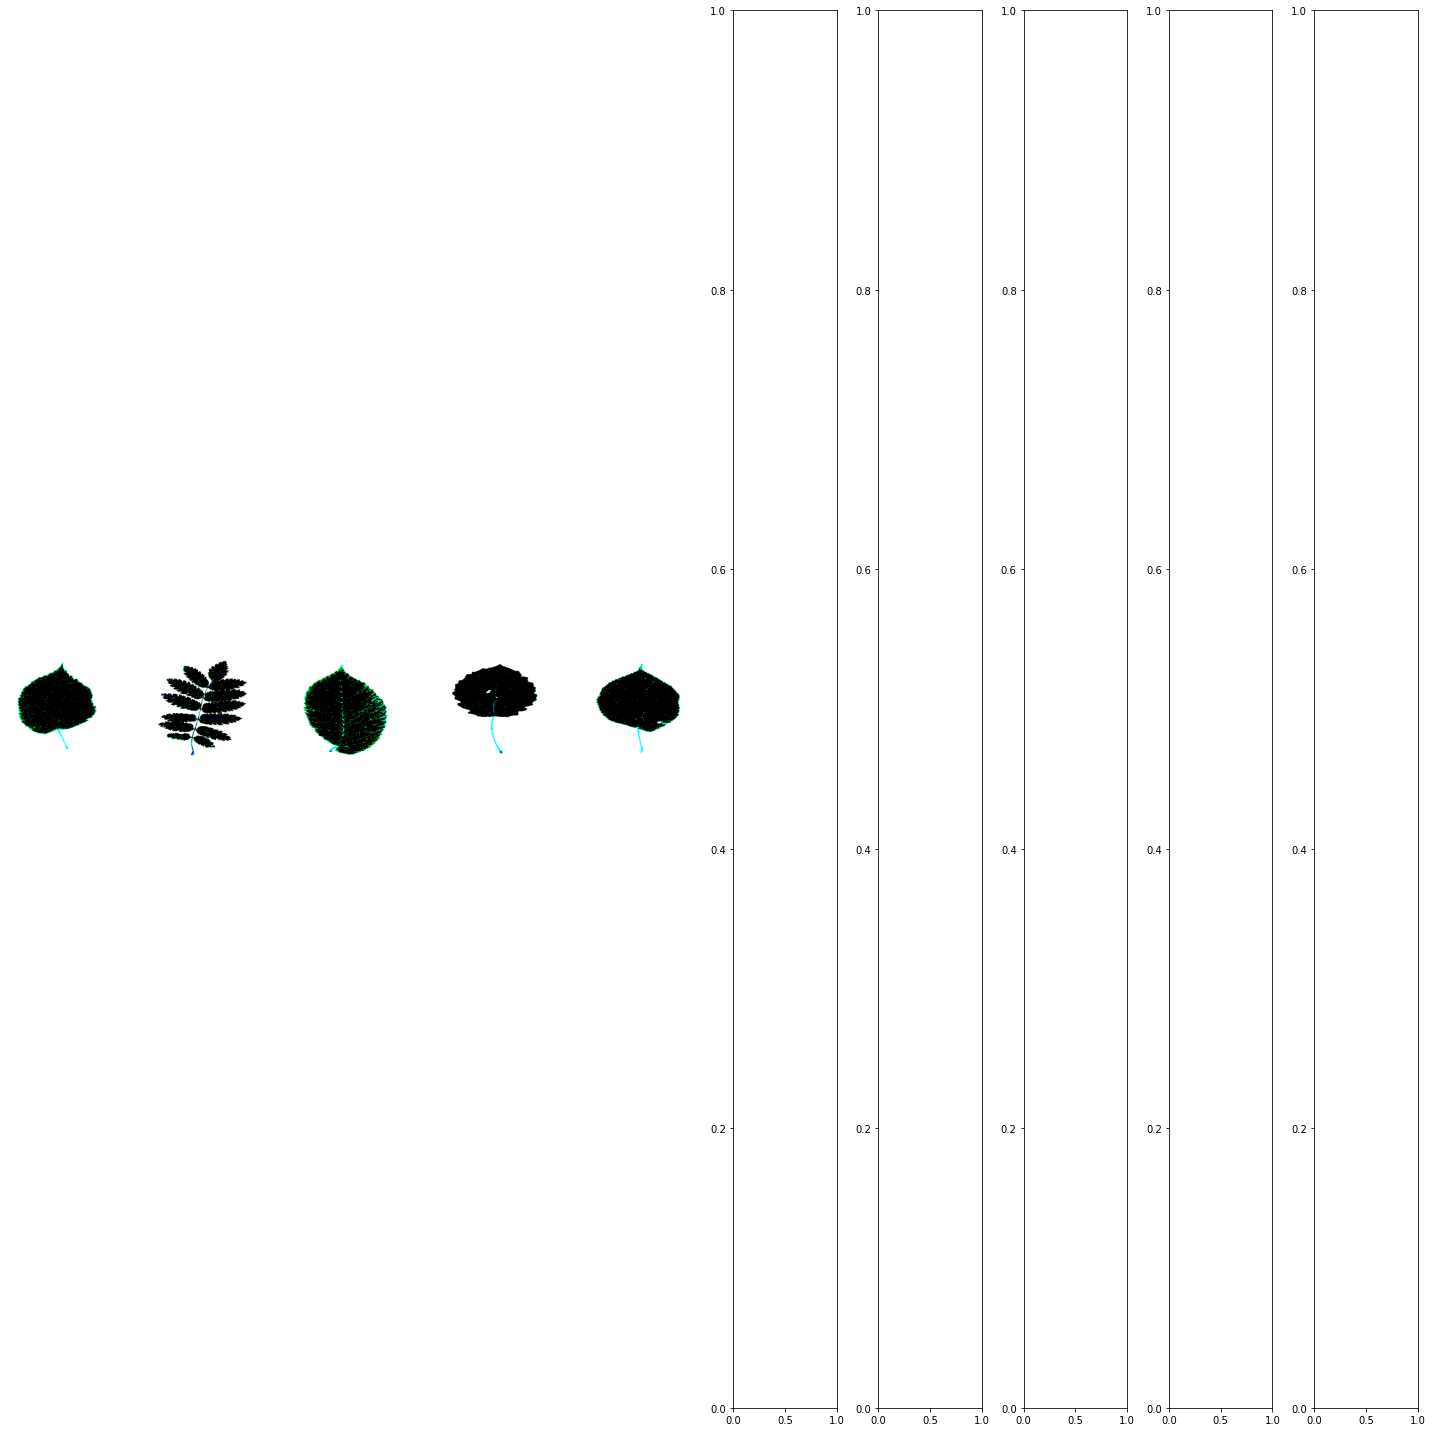

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
plotImages(imgs)
print(labels)

In [13]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(units=15, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=categorical_crossentropy, metrics=['accuracy'])

In [16]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
180/180 - 122s - loss: 63.4027 - accuracy: 0.4411 - val_loss: 10.6434 - val_accuracy: 0.5000 - 122s/epoch - 679ms/step
Epoch 2/20
180/180 - 98s - loss: 1.4379 - accuracy: 0.8478 - val_loss: 1.8302 - val_accuracy: 0.7733 - 98s/epoch - 542ms/step
Epoch 3/20
180/180 - 96s - loss: 0.2831 - accuracy: 0.9322 - val_loss: 1.7705 - val_accuracy: 0.7733 - 96s/epoch - 535ms/step
Epoch 4/20
180/180 - 96s - loss: 0.1214 - accuracy: 0.9711 - val_loss: 0.9805 - val_accuracy: 0.7933 - 96s/epoch - 534ms/step
Epoch 5/20
180/180 - 96s - loss: 0.0240 - accuracy: 0.9911 - val_loss: 1.1087 - val_accuracy: 0.8267 - 96s/epoch - 534ms/step
Epoch 6/20
180/180 - 97s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.0206 - val_accuracy: 0.8267 - 97s/epoch - 536ms/step
Epoch 7/20
180/180 - 96s - loss: 2.0602e-04 - accuracy: 1.0000 - val_loss: 1.0155 - val_accuracy: 0.8267 - 96s/epoch - 535ms/step
Epoch 8/20
180/180 - 96s - loss: 1.4828e-04 - accuracy: 1.0000 - val_loss: 1.0091 - val_accuracy: 0.8267 - 96s

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


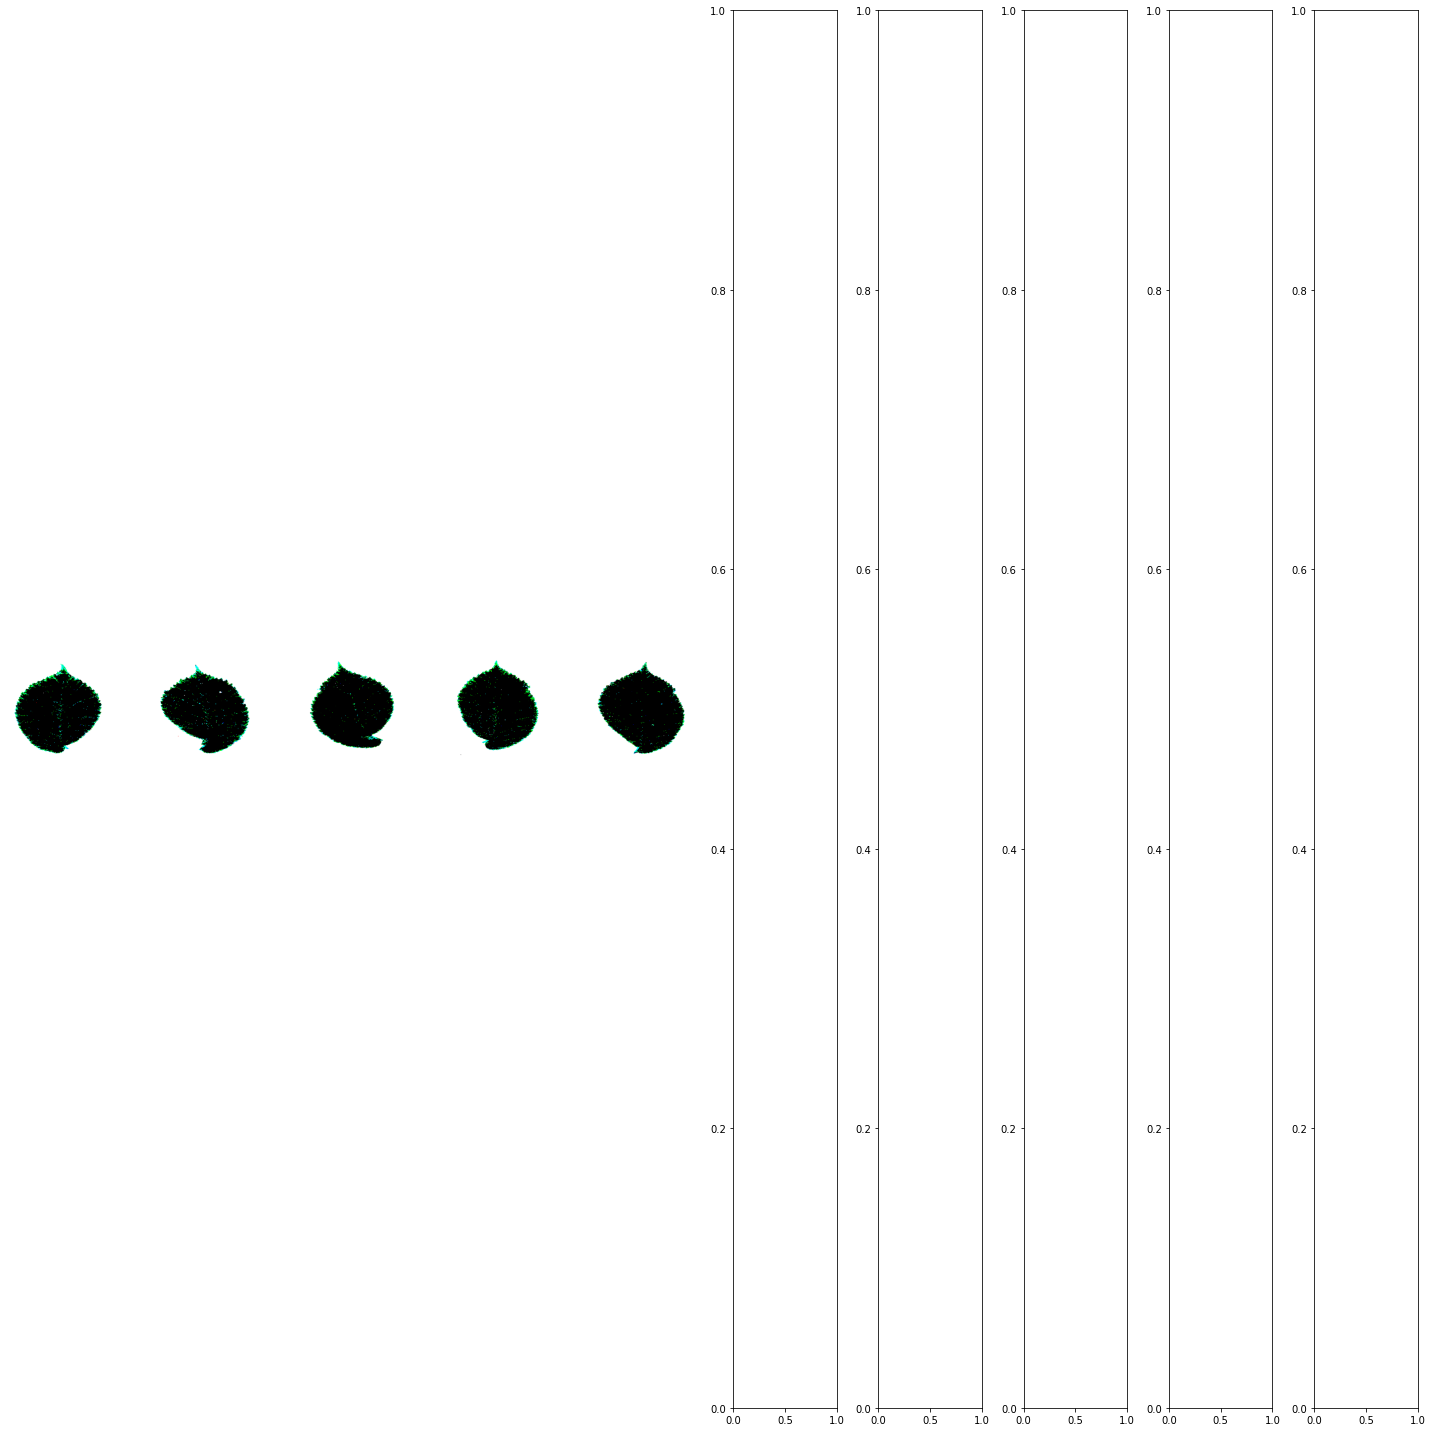

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [18]:
test_batches.classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14])

In [19]:
predictions = model.predict(x=test_batches, verbose=0)

In [20]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")

    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [23]:
test_batches.class_indices

{'Ulmus_carpinifolia': 0,
 'Acer': 1,
 'Salix_aurita': 2,
 'Quercus': 3,
 'Alnus_incana': 4,
 'Betula_pubescens': 5,
 'Salix_alba': 6,
 'Populus_tremula': 7,
 'Ulmus_glabra': 8,
 'Sorbus_aucuparia': 9,
 'Salix_sinerea': 10,
 'Populus': 11,
 'Tilia': 12,
 'Sorbus_intermedia': 13,
 'Fagus_silvatica': 14}

Confusion Matrix Without Normalization
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]


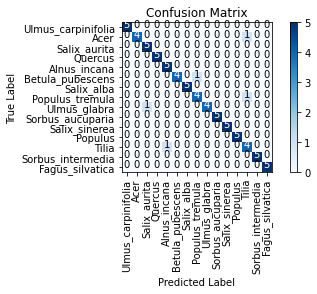

In [24]:
cm_plot_labels = species
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [26]:
print(classification_report(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       0.80      0.80      0.80         5
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       0.67      0.80      0.73         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94   